In [1]:
!pip install kaggle

In [2]:
import kaggle 

# 🧪 How to verify it's working in Python (VS Code):
Now, in VS Code, you can test it by running:

In [3]:
!kaggle datasets list -s netflix

ref                                                            title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
netflix-inc/netflix-prize-data                                 Netflix Prize data                                   716193814  2019-11-13 18:39:37.417000          99525       1410  0.7647059        
shivamb/netflix-shows                                          Netflix Movies and TV Shows                            1400865  2021-09-27 04:44:36.770000         592633       9096  1.0              
imtkaggleteam/netflix                                          NetFlix                                                1224946  2023-11-05 08:01:21.163000           2933         96  1.0              
thede

# Download works but unzipping doesn't works

In [ ]:
import kaggle

# Example: Netflix dataset
!kaggle datasets download -d shivamb/netflix-shows

# Unzip it
!unzip netflix-shows.zip -d ./netflix


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip' is not recognized as an internal or external command,
operable program or batch file.


## It makes a folder & then extract


In [8]:
import zipfile

with zipfile.ZipFile("netflix-shows.zip", 'r') as zip_ref:
    zip_ref.extractall("netflix")


In [3]:
import pandas as pd
df = pd.read_csv("netflix/netflix_titles.csv")


In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [1]:
!pip install pandasql

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26801 sha256=5891921f706aeceb9816fce2a083f6e754affc180ca5c0a676fd8164dcd9c311
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\15\a1\e7\6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [5]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT type, COUNT(*) as count
FROM df
GROUP BY type
"""

result = pysqldf(query)
print(result)


      type  count
0    Movie   6131
1  TV Show   2676


## OR


In [6]:
from pandasql import sqldf

query = """
SELECT type, COUNT(*) as count
FROM df
GROUP BY type
"""

result = sqldf(query, locals())
print(result)


      type  count
0    Movie   6131
1  TV Show   2676


In [9]:
query = """
SELECT type, COUNT(*) as count
FROM df
GROUP BY type
"""

result = pysqldf(query)
result  # or result.head()

,type,count
0,Movie,6131
1,TV Show,2676


In [7]:
q2 = """SELECT * FROM df WHERE date_added LIKE '%2020%'"""
print(pysqldf(q2).head())

  show_id     type                           title         director  \
0   s1471    Movie                Alaska Is a Drag     Shaz Bennett   
1   s1472    Movie           Best of Stand-Up 2020             None   
2   s1473    Movie                    Bobby Jasoos     Samar Shaikh   
3   s1474  TV Show  Chilling Adventures of Sabrina             None   
4   s1475    Movie                   Tarung Sarung  Archie Hekagery   

                                                cast        country  \
0  Martin L. Washington Jr., Maya Washington, Mat...  United States   
1  Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...           None   
2  Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...          India   
3  Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...  United States   
4  Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...      Indonesia   

          date_added  release_year rating   duration  \
0  December 31, 2020          2017  TV-MA     83 min   
1  December 31, 2020          2020

In [8]:
q2 = """SELECT * FROM df WHERE date_added LIKE '%2020%'"""
result_q2 = pysqldf(q2)  # Store as a DataFrame
result_q2.head()         # Show top 5 rows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1471,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,"December 31, 2020",2017,TV-MA,83 min,"Dramas, LGBTQ Movies","Tormented by bullies, an aspiring drag star wo..."
1,s1472,Movie,Best of Stand-Up 2020,None,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",None,"December 31, 2020",2020,TV-MA,77 min,Stand-Up Comedy,"From Jerry Seinfeld to Leslie Jones, Kevin Har..."
2,s1473,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,"December 31, 2020",2014,TV-14,116 min,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...
3,s1474,TV Show,Chilling Adventures of Sabrina,None,"Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...",United States,"December 31, 2020",2020,TV-14,4 Seasons,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy","Magic and mischief collide as half-human, half..."
4,s1475,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,"December 31, 2020",2020,TV-PG,116 min,"Action & Adventure, Dramas, Faith & Spirituality","Wealthy and spoiled, a young man finds somethi..."


## For kaggle (PANDASQL)

In [ ]:
# Install if needed
!pip install pandasql --quiet

import pandas as pd
from pandasql import sqldf

# Load the dataset (adjust path if needed)
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")  # or local path
pysqldf = lambda q: sqldf(q, globals())

In [10]:
q6 = """
SELECT director, COUNT(*) as total 
FROM df 
WHERE director IS NOT NULL 
GROUP BY director 
ORDER BY total DESC 
LIMIT 5
"""

top_directors = pysqldf(q6)  # This is a DataFrame
top_directors  # Displays as a table in Jupyter/Colab/Kaggle


,director,total
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14


C:\Users\Dell\AppData\Local\Temp\ipykernel_10376\3058761600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors, x="total", y="director", palette="viridis")
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


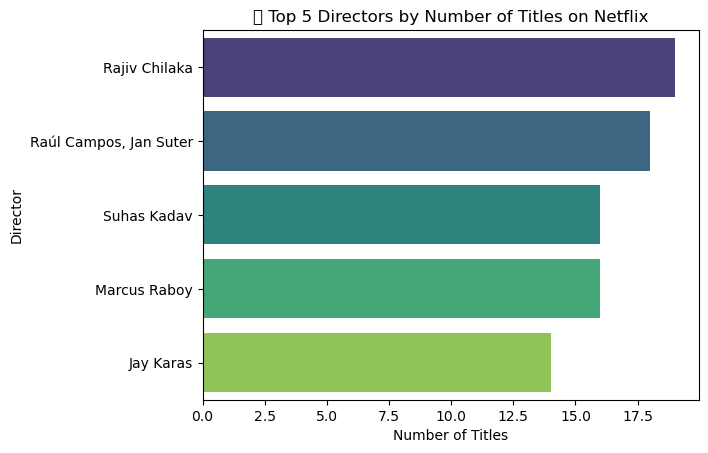

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=top_directors, x="total", y="director", palette="viridis")
plt.title("🎬 Top 5 Directors by Number of Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


## For Advanced SQL comple Use duckdb

In [12]:
!pip install duckdb

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
    --------------------------------------- 0.3/11.4 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.4 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.4 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.4 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.4 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.4 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.4 MB 1.6 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.4 MB 1.8 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.4 MB 1.9 MB/s eta 0:00:05
   ---------------- ----------------------- 4.7/11.4 MB 2.2 MB/s eta 0:00:04
   ------------------ -----

In [13]:
import duckdb

duckq = lambda q: duckdb.query(q).to_df()

# Usage
query = "SELECT type, COUNT(*) as count FROM df GROUP BY type"
result = duckq(query)


In [14]:
result

,type,count
0,TV Show,2676
1,Movie,6131


| Part              | Meaning                                                     |
| ----------------- | ----------------------------------------------------------- |
| `duckq =`         | Create a new variable (your query function) called `duckq`. |
| `lambda q:`       | Anonymous function that takes a SQL query (`q`) as input.   |
| `duckdb.query(q)` | Run the SQL query using DuckDB.                             |
| `.to_df()`        | Convert the result to a pandas DataFrame. ✅                 |


In [21]:
query = """
SELECT 
  title,
  type,
  release_year,
  ROW_NUMBER() OVER (PARTITION BY type ORDER BY release_year DESC) AS row_num
FROM df
WHERE release_year IS NOT NULL
LIMIT 10
"""

result = duckq(query)

In [22]:
result

,title,type,release_year,row_num
0,The Netflix Afterparty,TV Show,2021,1
1,Midnight Mass,TV Show,2021,2
2,The Great British Baking Show,TV Show,2021,3
3,"Vendetta: Truth, Lies and The Mafia",TV Show,2021,4
4,Bangkok Breaking,TV Show,2021,5
5,Crime Stories: India Detectives,TV Show,2021,6
6,Dear White People,TV Show,2021,7
7,Jaguar,TV Show,2021,8
8,Monsters Inside: The 24 Faces of Billy Milligan,TV Show,2021,9
9,Love on the Spectrum,TV Show,2021,10


In [18]:
query = """
SELECT type, COUNT(*) as total
FROM df
GROUP BY type
"""

result = duckdb.query(query).to_df()
print(result)


      type  total
0    Movie   6131
1  TV Show   2676


In [20]:
query = """
SELECT 
  title,
  type,
  release_year,
  ROW_NUMBER() OVER (PARTITION BY type ORDER BY release_year DESC) AS row_num
FROM df
WHERE release_year IS NOT NULL
LIMIT 10
"""

result = duckdb.query(query).to_df()
result


,title,type,release_year,row_num
0,Midnight Mass,TV Show,2021,1
1,The Great British Baking Show,TV Show,2021,2
2,"Vendetta: Truth, Lies and The Mafia",TV Show,2021,3
3,Bangkok Breaking,TV Show,2021,4
4,Crime Stories: India Detectives,TV Show,2021,5
5,Dear White People,TV Show,2021,6
6,Jaguar,TV Show,2021,7
7,Monsters Inside: The 24 Faces of Billy Milligan,TV Show,2021,8
8,Love on the Spectrum,TV Show,2021,9
9,Chicago Party Aunt,TV Show,2021,10


## For Kaggle - DUCKDB

In [ ]:
!pip install duckdb --quiet


In [ ]:
import duckdb

# Your Netflix DataFrame
import pandas as pd
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# DuckDB shortcut function
duckq = lambda q: duckdb.query(q).to_df()

query = """

SELECT type, COUNT(*) FROM df GROUP BY type

 """

# Run a SQL query using your shortcut
result = duckq(query)
result


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid')

# Run your query again (optional)
query = """
SELECT type, COUNT(*) as count FROM df GROUP BY type
"""
result = duckq(query)

# Plot using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=result, x='type', y='count', palette='Set2')

# Add titles and labels
plt.title("🎬 Count of Movies vs TV Shows on Netflix", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


## ✅ DuckDB Version of Your DB Class

dbhelper_duckdb.py

In [ ]:
import duckdb

class DB:
    def __init__(self, db_path="video_game_sales.duckdb"):
        try:
            self.conn = duckdb.connect(db_path)
            self.cursor = self.conn.cursor()
            print("✅ DuckDB connected")
        except Exception as e:
            print("❌ Connection failed:", e)

    def fetch_genres(self):
        try:
            self.cursor.execute("SELECT DISTINCT genre FROM video_game_sales ORDER BY genre")
            return [row[0] for row in self.cursor.fetchall()]
        except Exception as e:
            print("❌ Failed to fetch genres:", e)
            return []


# 🧪 Example Usage

In [ ]:
import pandas as pd
from dbhelper_duckdb import DB  # Assuming your class is saved in this file

# ✅ Step 1: Load CSV data
df = pd.read_csv("video_game_sales.csv")

# ✅ Step 2: Create DuckDB file and save the DataFrame as a table (only once)
import duckdb
conn = duckdb.connect("video_game_sales.duckdb")
conn.register("df", df)
conn.execute("CREATE TABLE IF NOT EXISTS video_game_sales AS SELECT * FROM df")
conn.close()

# ✅ Step 3: Use the DB class to connect to the DuckDB file
db = DB("video_game_sales.duckdb")

# Now use the DB class
# db = DB()  # Defaults to video_game_sales.duckdb
# genres = db.fetch_genres()
# print(genres)

# ✅ Step 4: Fetch genres
genres = db.fetch_genres()
print("🎮 Genres:", genres)

# ✅ Step 5: Run a custom query
def run_query(query):
    try:
        
        return db.cursor.execute(query).fetchdf()
    except Exception as e:
        print("❌ Query failed:", e)
        return None

query = """
SELECT platform, COUNT(*) AS count 
FROM video_game_sales 
GROUP BY platform 
ORDER BY count DESC
LIMIT 5
"""

result = run_query(query)
print("🎮 Top Platforms:\n", result)


| Code                               | What It Does                                      |
| ---------------------------------- | ------------------------------------------------- |
| `duckdb.connect("file.duckdb")`    | Creates (or opens) a **persistent file-based DB** |
| `duckdb.connect()` or `":memory:"` | Creates a **temporary in-memory DB**              |


In [ ]:
import duckdb

class DB:
    def __init__(self, df):
        try:
            self.conn = duckdb.connect()  # In-memory connection
            self.cursor = self.conn.cursor()
            self.cursor.register("video_game_sales", df)  # Register your DataFrame as a table
            print("✅ DuckDB connected and DataFrame registered")
        except Exception as e:
            print("❌ Connection failed:", e)

    def fetch_genres(self):
        try:
            self.cursor.execute("SELECT DISTINCT genre FROM video_game_sales ORDER BY genre")
            return [row[0] for row in self.cursor.fetchall()]
        except Exception as e:
            print("❌ Failed to fetch genres:", e)
            return []

    def run_query(self, query):
        try:
            return self.cursor.execute(query).fetchdf()
        except Exception as e:
            print("❌ Query execution failed:", e)
            return None


# 🧪 Example Usage

In [ ]:
import pandas as pd
from dbhelper_duckdb import DB

# Load dataset
df = pd.read_csv("video_game_sales.csv")

# Create DB instance with the DataFrame
db = DB(df)

# Example: Get genres
genres = db.fetch_genres()
print(genres)

# Example: Run a query
result = db.run_query("SELECT platform, COUNT(*) AS count FROM video_game_sales GROUP BY platform")
print(result)


# ✅ Dbhelper_pandasql.py

In [ ]:
from pandasql import sqldf

class DB:
    def __init__(self, dataframes: dict):
        """
        Initialize the DB helper with a dictionary of pandas DataFrames.
        Example: {'df': your_dataframe}
        """
        self.dataframes = dataframes
        self.query_engine = lambda q: sqldf(q, self.dataframes)
        print("✅ pandasql engine ready")

    def run_query(self, query: str):
        try:
            return self.query_engine(query)
        except Exception as e:
            print("❌ Query failed:", e)
            return None

    def fetch_genres(self):
        query = """
        SELECT DISTINCT genre 
        FROM video_game_sales 
        WHERE genre IS NOT NULL
        ORDER BY genre
        """
        return self.run_query(query)


# 🧪 Usage Example

In [ ]:
import pandas as pd
from dbhelper_pandasql import DB

# Load your CSV into a DataFrame
df = pd.read_csv("video_game_sales.csv")

# Initialize helper with DataFrame registered as 'video_game_sales'
db = DB({'video_game_sales': df})

# Run a custom query
result = db.run_query("SELECT platform, COUNT(*) as total FROM video_game_sales GROUP BY platform")
print(result)

# Use the helper method
genres = db.fetch_genres()
print(genres)


| DB             | `fetchdf()` Available? | Alternative                |
| -------------- | ---------------------- | -------------------------- |
| **DuckDB**     | ✅ Yes                  | `fetchdf()`                |
| **SQLite**     | ❌ No                   | `fetchall()` + `DataFrame` |
| **MySQL**      | ❌ No                   | `fetchall()` + `DataFrame` |
| **PostgreSQL** | ❌ No                   | `fetchall()` + `DataFrame` |


# For sqlite, mysql, postgresql

mysql


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# use mysql.connector.connect instead of mysql.connect
db = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="kaustav007",
    port=3306,
    database="ecommerce"
)

cur = db.cursor()

query = """ SELECT DISTINCT customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

sqlite

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("your_database.db")
cur = conn.cursor()

cur.execute("SELECT DISTINCT customer_city FROM customers")
rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(rows, columns=columns)


mysql

In [ ]:
import mysql.connector
import pandas as pd

# Step 1: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",        # or your DB host
    user="your_username",
    password="your_password",
    database="your_database"
)

cursor = conn.cursor()

# Step 2: Execute the Query
query = "SELECT DISTINCT customer_city FROM customers"
cursor.execute(query)

# Step 3: Fetch all results
rows = cursor.fetchall()

# Step 4: Get column names
columns = [desc[0] for desc in cursor.description]

# Step 5: Convert to DataFrame
df = pd.DataFrame(rows, columns=columns)

# Step 6: Print the DataFrame
print(df.head())

# Clean up
cursor.close()
conn.close()
